# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
#prepByYear <- c(DATE=weatherPraga["DATE"],PRCP=weatherPraga["PRCP"])   # LIST
prepByYear <- subset(weatherPraga, select=c("DATE", "PRCP"))            # DATAFRAME

#top10 <- head(sort(prepByYear$PRCP,decreasing=TRUE), n=10)               # NUM
top10 <- head(prepByYear[order(prepByYear$PRCP,decreasing=TRUE),], n=10)  # DATAFRAME

In [3]:
rownames(top10) <- NULL
top10    #print(top10)

DATE,PRCP
1939,745.5
1828,665.4
2002,661.5
1946,638.3
1890,637.3
1837,634.9
1958,633.1
1831,625.7
1966,624.1
1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

In [4]:
minTempYear <- subset(weatherPraga, select=c("DATE", "EMNT"))

#OPTION#1
#plot(minTempYear, xlab="Year", ylab="Min Temperature", main="Diagrama de Dispersión")
#model<-lm(data=minTempYear, formula=minTempYear$EMNT~minTempYear$DATE)
#abline(model,col="red",lwd=2)

#OPTION#2: ggplot
ggplot(minTempYear, aes(x=DATE, y=EMNT)) + 
    geom_point(shape=1, position=position_jitter(width=1,height=.5)) + 
    xlab("Year") + ylab("Min Temperature") + ggtitle("Diagrama de Dispersión") + 
    geom_smooth(method=lm,se=FALSE)

#summary(model)
print(paste("El aumento de temperatura anual es:", round(model$coefficients[2], 5)))

ERROR: Error in eval(expr, envir, enclos): could not find function "ggplot"


¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [5]:
# Subset required data
minTemp1775_1794<-subset(weatherPraga, weatherPraga$DATE >= 1775 & weatherPraga$DATE <= 1794, select=c("DATE", "EMNT"))
minTemp1985_2004<-subset(weatherPraga, weatherPraga$DATE >= 1985 & weatherPraga$DATE <= 2004, select=c("DATE", "EMNT"))

# Verify missing values (NA): na.rm=TRUE
#colSums(is.na(minTemp1775_1794))
#colSums(is.na(minTemp1985_2004))

# Mean
mean_1775_1794 <- mean(minTemp1775_1794$EMNT)     #20 values
mean_1985_2004 <- mean(minTemp1985_2004$EMNT)     #20 values

print(paste("La media de la temperatura mínima en el intervalo de años [1775,1794] es:", mean_1775_1794))
print(paste("La media de la temperatura mínima en el intervalo de años [1985,2004] es:", mean_1985_2004))

[1] "La media de la temperatura mínima en el intervalo de años [1775,1794] es: -16.935"
[1] "La media de la temperatura mínima en el intervalo de años [1985,2004] es: -13.04"


In [6]:
# Verify Gaussian distributions
#shapiro.test(minTemp1775_1794$EMNT)
#shapiro.test(minTemp1985_2004$EMNT)

paste("Los valores de temperatura minima en el periodo [1775,1794] parecen seguir una gaussiana. pvalor:",
         round(shapiro.test(minTemp1775_1794$EMNT)$p.value, 5))
paste("Los valores de temperatura minima en el periodo [1985,2004] parecen seguir una gaussiana. pvalor:",
         round(shapiro.test(minTemp1985_2004$EMNT)$p.value, 5))

[1] "Los valores de temperatura minima en el periodo [1775,1794] parecen seguir una gaussiana. pvalor: 0.38083"

[1] "Los valores de temperatura minima en el periodo [1985,2004] parecen seguir una gaussiana. pvalor: 0.0751"

Los resultados (con p-valor 0.38083 y 0.0751) son mayores que el nivel de confianza (0,05%), por lo que NO se rechaza la hipótesis nula y se concluye que los datos siguen una distribución normal.

In [7]:
# Verify homocedastic
print("Test de varianza de Fisher")
print(paste("p-value:", var.test(minTemp1775_1794$EMNT, minTemp1985_2004$EMNT)$p.value))

[1] "Test de varianza de Fisher"
[1] "p-value: 0.0109964008935728"


* La hipótesis nula H0:la varianza es constante (no varía) en los diferentes grupos. 

Como el p-valor es 0.0109, y éste es un valor menor de 0.05, se rechaza la hipótesis nula (H0). Esto nos indica que las muestras presentan varianzas distintas.

Se puede aplicar el test de Welch para saber si existe una diferencia estadística significativa entre las las medias de las temperaturas mínimas.

In [8]:
print("Test de varianza de Fisher")
tw<-t.test(minTemp1775_1794$EMNT, minTemp1985_2004$EMNT)
print(paste("p-value:", tw$p.value))

[1] "Test de varianza de Fisher"
[1] "p-value: 0.0257068429001728"


In [9]:
print("Podemos rechazar la hipótesis nula y asumir que hay las medias son estadisticamente distintas puesto que el p-value es muy bajo.")

[1] "Podemos rechazar la hipótesis nula y asumir que hay las medias son estadisticamente distintas puesto que el p-value es muy bajo."


## Datos banco mundial

Carga los datos del banco mundial

In [10]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)

#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [11]:
# Search about CO2 indicators
#indicatorsCO2 <- indicators[grep("CO2", indicators$INDICATOR_NAME), ]
#indicatorsCO2 <- indicators[grep("EN.ATM.CO2E", indicators$INDICATOR_CODE), ]

# Filter databank by "Total greenhouse gas emissions (kt of CO2 equivalent)" indicator
#dataCO2emission <- databank[databank$Indicator.Code == 'EN.ATM.GHGT.KT.CE', ]
#dataCO2emission <- databank[which(databank$Indicator.Code == 'EN.ATM.GHGT.KT.CE'), ]
dataCO2emission <- subset(databank, databank$Indicator.Code == 'EN.ATM.GHGT.KT.CE')

# Filter by real countries: join with realCountryData data.frame to get countries rows only
co2Country <- merge(dataCO2emission, realCountryData, by = "Country.Code")

# Data for year 1970
co2Country1970 <- subset(co2Country, select=c('Country.Name', 'Country.Code', '1970'))

# Order data
co2Country1970 <- co2Country1970[order(co2Country1970$'1970',decreasing=TRUE),]

# Get first
mostPolluting1970 <- head(co2Country1970, 1)

print(paste("El país que más toneladas de CO2 equivalente emitió en 1970 es:", mostPolluting1970[[1]], '(', mostPolluting1970[[2]], ')'))


[1] "El país que más toneladas de CO2 equivalente emitió en 1970 es: United States ( USA )"


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [12]:
# Data for year 2012
co2Country2012 <- subset(co2Country, select=c('Country.Name', 'Country.Code', '2012'))

# Order data
co2Country2012 <- co2Country2012[order(co2Country2012$'2012',decreasing=TRUE),]

# Get 5 firsts
top5Polluting <- head(co2Country2012, 5)
rownames(top5Polluting) <- NULL
top5Polluting


Country.Name,Country.Code,2012
China,CHN,12454711
United States,USA,6343841
India,IND,3002895
Brazil,BRA,2989418
Russian Federation,RUS,2803398


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [13]:
year <- seq(2000, 2012)
valueDF <- co2Country[co2Country$Country.Code == 'CHN', as.character(year)]   # Use subset as other option
valueV <- as.numeric(as.vector(valueDF[1,]))
growthRate <- (valueV[2:length(valueV)] - valueV[1:length(valueV)-1]) * 100 / valueV[1:length(valueV)-1]

print(paste("La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 es:",
             round(mean(growthRate), 3),"%"))

[1] "La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 es: 7.82 %"


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [14]:
# Filter databank by "CO2 emissions (metric tons per capita)" indicator
#dataCO2PC <- databank[which(databank$Indicator.Code == 'EN.ATM.CO2E.PC'), ]
dataCO2PC <- subset(databank, databank$Indicator.Code == 'EN.ATM.CO2E.PC')

# Filter by real countries
dataCO2PCCountry <- merge(dataCO2PC, realCountryData, by = "Country.Code")

# Data for years 1960, 1990, 2014
dataCO2PCCountryYears <- subset(dataCO2PCCountry, select=c('Country.Name', 'Country.Code', '1960', '1990', '2014'))
#head(dataCO2PCCountryYears)
#tail(dataCO2PCCountryYears)


In [15]:
require(reshape2)

co2pcmelt <- melt(dataCO2PCCountryYears, id=c("Country.Name","Country.Code"),
                  variable.name = "Year", value.name = "co2pc", na.rm = TRUE)   # with na.rm=TRUE: 124 NA's are removed
#head(co2pcmelt)  


Loading required package: reshape2


**Diagrama de cajas**

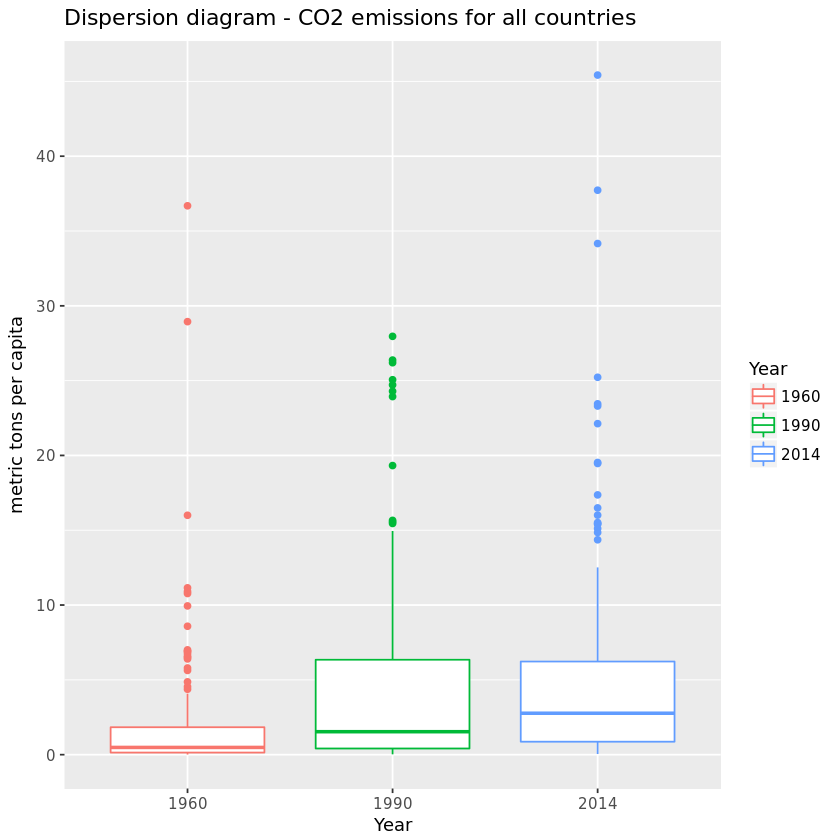

In [16]:
library(ggplot2)
ggplot(data=co2pcmelt, aes(x=Year,y=co2pc,color=Year)) + geom_boxplot() +
    ylab("metric tons per capita") + ggtitle("Dispersion diagram - CO2 emissions for all countries")

**Histograma**

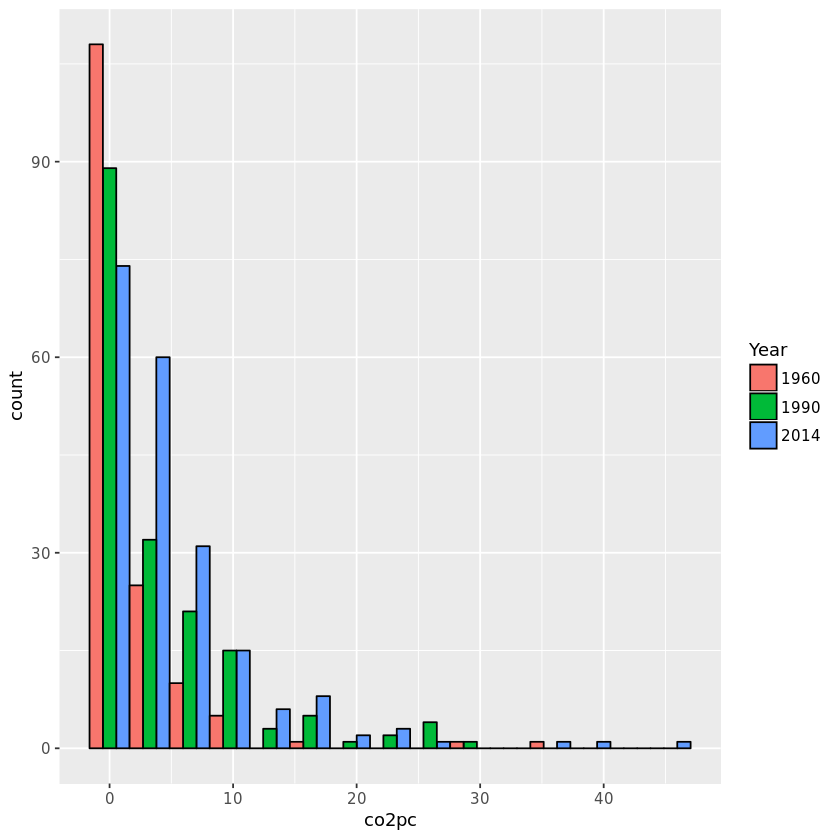

In [17]:
ggplot(data=co2pcmelt, aes(x=co2pc,fill=Year)) + geom_histogram(color="black",bins = 15, position="dodge")

**Curvas de densidad**

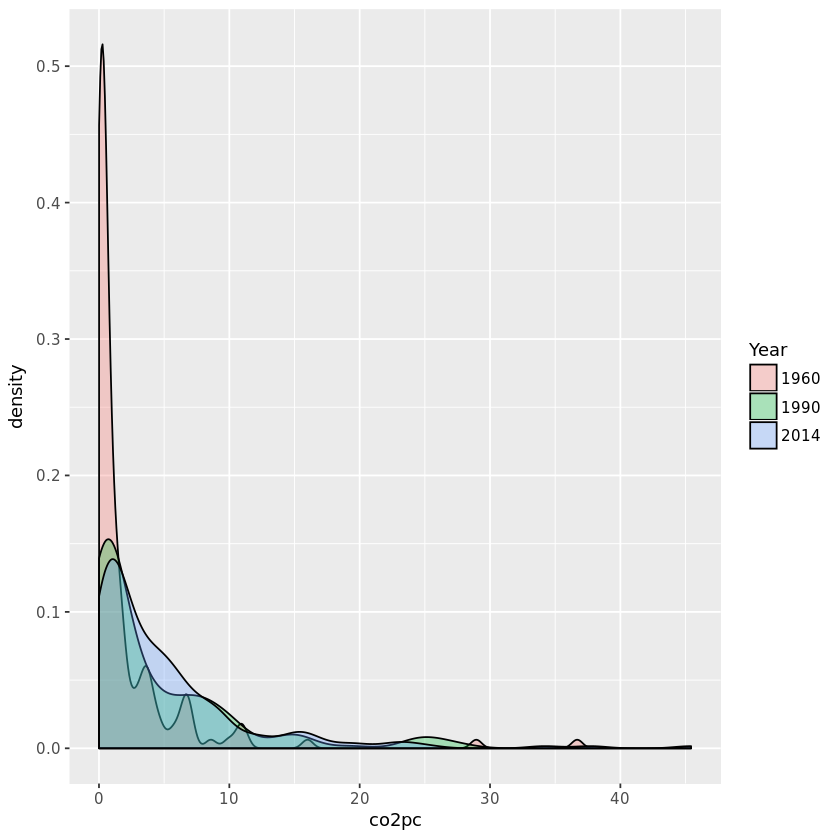

In [18]:
ggplot(data=co2pcmelt, aes(x=co2pc,fill=Year)) + geom_density(alpha = 0.3)

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

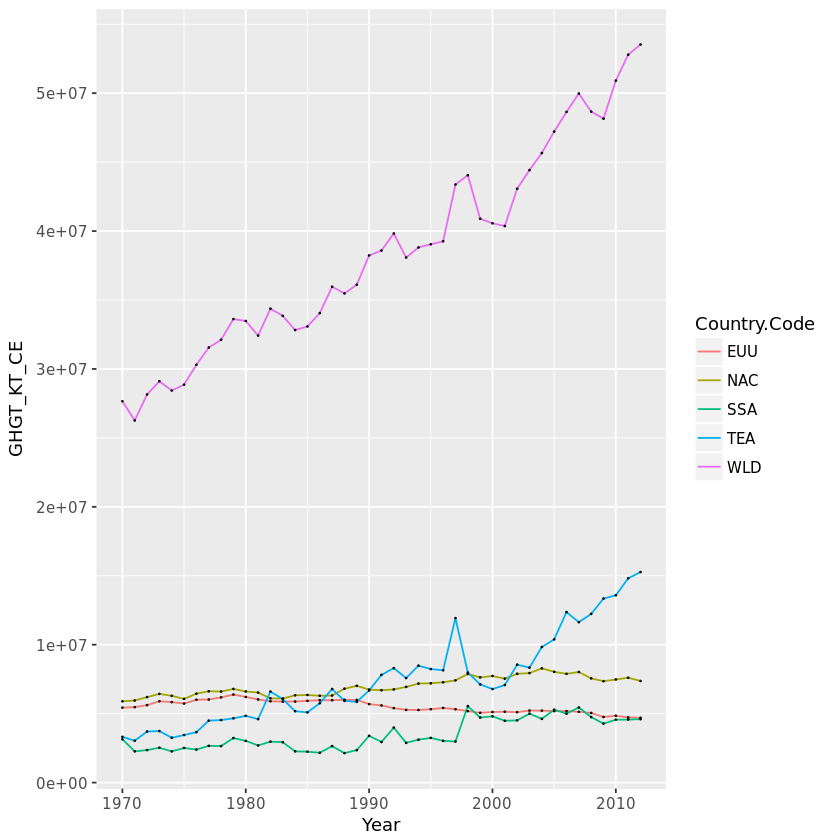

In [19]:
dataCO2emission <- subset(databank, databank$Indicator.Code == 'EN.ATM.GHGT.KT.CE')

# Filter by specific region
regions <- c('WLD', 'EUU', 'SSA', 'NAC', 'TEA')
#dataCO2emission[is.element(dataCO2emission$Country.Code, regions),]   # other option using is.element
co2Region <- dataCO2emission[dataCO2emission$Country.Code %in% regions,]

# Drop unnecessary columns
drops <- c("Indicator.Name","Indicator.Code")
co2Region <- co2Region[ , !(names(co2Region) %in% drops)]

# Transpose years columns
co2ktRegionmelt <- melt(co2Region, id=c("Country.Name","Country.Code"),variable.name="Year",value.name="GHGT_KT_CE",na.rm=TRUE)
#nrow(co2ktRegionmelt)
#head(co2ktRegionmelt, 15)
#str(co2ktRegionmelt)
co2ktRegionmelt$Year <- as.numeric(as.character(co2ktRegionmelt$Year))

# Plot
ggplot(data=co2ktRegionmelt,aes(x=Year,y=GHGT_KT_CE))+geom_line(aes(color=Country.Code))+geom_point(color="black",size = 0.1)


Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

[1] "Predicción del total de emisiones de CO2 en todo el mundo en el año 2020"
[1] "Modelo de regresión con polinomio grado 1: 55152033.546"
[1] "Modelo de regresión con polinomio grado 3: 65067658.636"
[1] "Modelo de regresión con polinomio grado 10: 462426958.414"


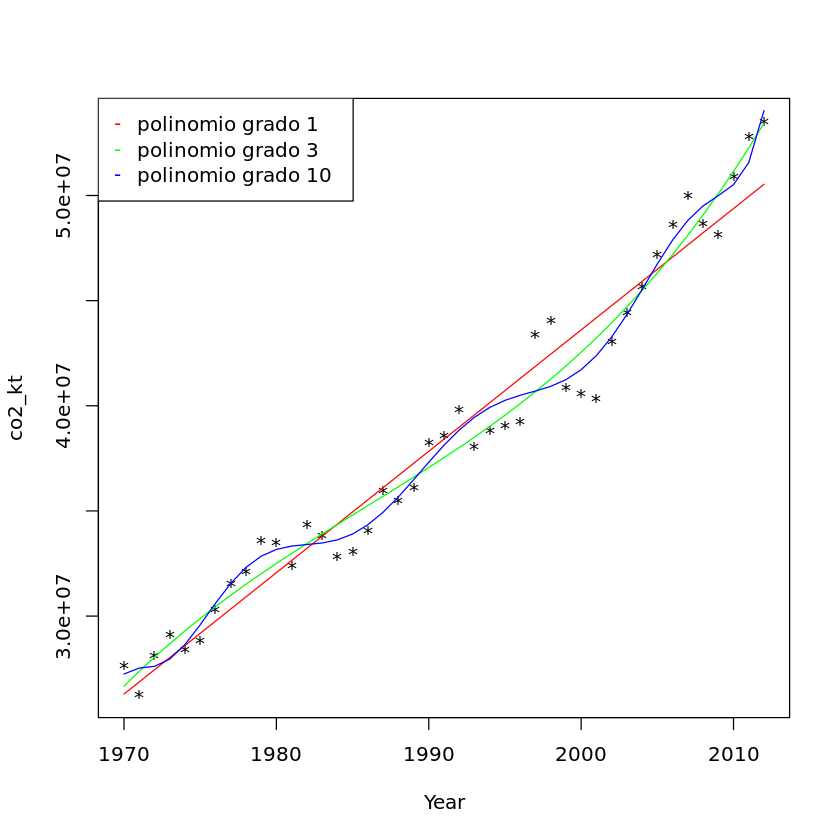

In [23]:
# Emisiones de CO2 en todo el mundo
worldco2kt <- subset(co2ktRegionmelt, co2ktRegionmelt$Country.Code == "WLD")

# Prediccion del total de emisiones de CO2 en todo el mundo en el año 2020
y <- worldco2kt$GHGT_KT_CE
x <- worldco2kt$Year
plot(x,y,pch='*',xlab="Year",ylab="co2_kt")  #xlim=c(1970, 2025),ylim=c(2e7, 8e7)

modelPolyn1  <- lm(y~poly(x,1))   # Modelo de regresion lineal polinomio grado 1 equivalente: model <- lm(y~x) (coeficientes distintos)
modelPolyn3  <- lm(y~poly(x,3))
modelPolyn10 <- lm(y~poly(x,10))

# Rectas de regresion: Interpolacion
yp1  <- predict(modelPolyn1, data.frame(x))
yp3  <- predict(modelPolyn3, data.frame(x))
yp10 <- predict(modelPolyn10, data.frame(x))

xp <- seq(1970, 2012, by = 1)
lines(xp,yp1,col="red")
lines(xp,yp3,col="green")
lines(xp,yp10,col="blue")
legend(x="topleft", y=0.5, legend=c("polinomio grado 1","polinomio grado 3","polinomio grado 10"),
       pch='-', col=c('red','green','blue'))

# Recta regresion: Extrapolacion
newYear = 2020
yp1_2020  <- predict(modelPolyn1, newdata = data.frame(x=newYear))
yp3_2020  <- predict(modelPolyn3, newdata = data.frame(x=newYear))
yp10_2020 <- predict(modelPolyn10, newdata = data.frame(x=newYear))

print("Predicción del total de emisiones de CO2 en todo el mundo en el año 2020")
print(paste("Modelo de regresión con polinomio grado 1:", round(yp1_2020,3)))
print(paste("Modelo de regresión con polinomio grado 3:", round(yp3_2020,3)))
print(paste("Modelo de regresión con polinomio grado 10:", round(yp10_2020,3)))



## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [24]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

In [25]:
head(co2ppm)

year,month,date,average,interpolated,trend,days
1958,4,1958.292,317.45,317.45,315.29,-1
1958,5,1958.375,317.50,317.50,314.71,-1
1958,6,1958.458,-99.99,317.10,314.85,-1
1958,7,1958.542,315.86,315.86,314.98,-1
1958,8,1958.625,314.93,314.93,315.94,-1
1958,9,1958.708,313.20,313.20,315.91,-1


Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

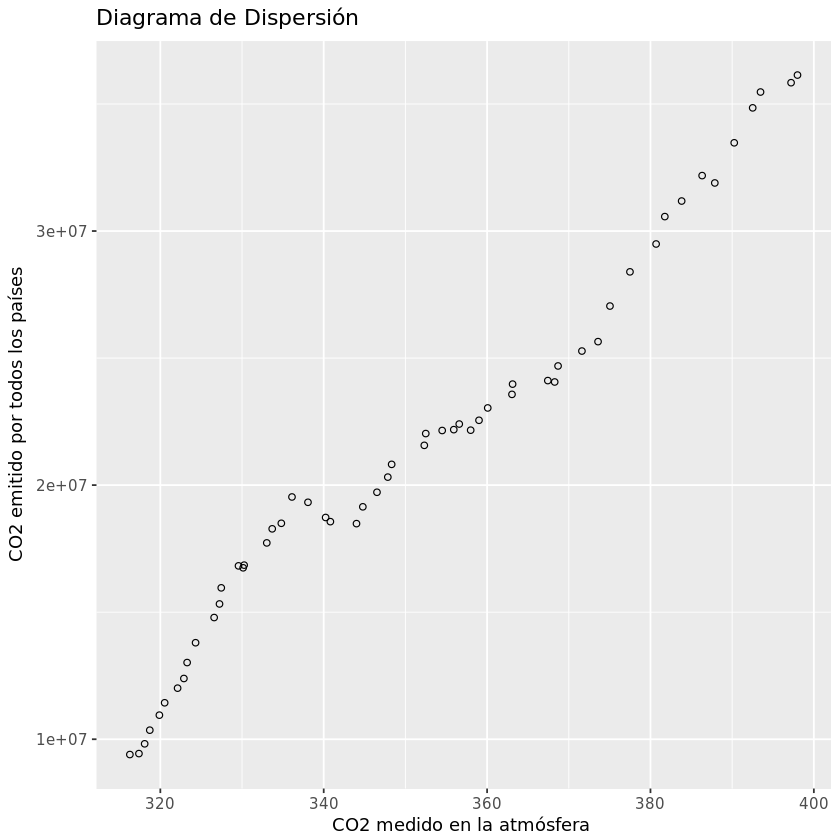

In [26]:
##-- CO2 medido en la atmósfera (interpolated) --##
# Aggregate by year
co2ppmAVG <- aggregate(co2ppm[, 3:6], by=list(co2ppm$year), mean)   # ignore column 'days' ??
colnames(co2ppmAVG)[1] <- 'year'

##-- CO2 emitido por todos los países --##
#worlddata <- databank[ which(databank$Indicator.Code=="EN.ATM.CO2E.KT" & databank$Country.Code=="WLD") , ]
worlddata <- subset(databank, databank$Indicator.Code=="EN.ATM.CO2E.KT" & databank$Country.Code=="WLD")

# Mode#1: Remove columns with string values and transpose dataframe
#worlddata <- worlddata[,5:ncol(worlddata)]
#worlddata <- data.frame(t(worlddata))
# Mode#2: melt
# Drop unnecessary columns
drops <- c("Indicator.Name","Indicator.Code")
worlddata <- worlddata[ , !(names(worlddata) %in% drops)]
worlddata <- melt(worlddata, id=c("Country.Name","Country.Code"),variable.name="year",value.name="co2kt",na.rm=TRUE)

## There are different lengths: we consider two possible options to resolve it.
#nrow(co2ppmAVG)   # 60 rows
#nrow(worlddata)   # 55 rows

#-------------------------------------------------------------------------------------------------------------#
## Option#1: fill in incomplete years with zero value
#-------------------------------------------------------------------------------------------------------------#
#
## Indexes of incomplete years
#worlddata$year <- as.numeric(as.character(worlddata$year))
##str(worlddata)
#indexBlankYears <- which( !co2ppmAVG$year %in% worlddata$year )
#blankYears <- co2ppmAVG[indexBlankYears, ]$year
#
## Fill zero values
#cn <- worlddata$Country.Name[1]
#cc <- worlddata$Country.Code[1]
#for (y in blankYears) {
#    worlddata[nrow(worlddata) + 1,] = c(Country.Name=as.character(cn), Country.Code=as.character(cc), year=y, co2kt=0)
#}
#
## Order by year
#worlddata <- worlddata[order(worlddata$year),]

#-------------------------------------------------------------------------------------------------------------#
## Option#2: drop extra years
#-------------------------------------------------------------------------------------------------------------#

indexExtraYears <- which( co2ppmAVG$year %in% worlddata$year )
co2ppmAVG <- co2ppmAVG[indexExtraYears,]

# Plot
total <- merge(co2ppmAVG, worlddata, by="year")
ggplot(total, aes(x=interpolated, y=co2kt)) + 
    geom_point(shape=1, position=position_jitter(width=1,height=.5)) + 
    xlab("CO2 medido en la atmósfera ") + ylab("CO2 emitido por todos los países") + ggtitle("Diagrama de Dispersión") 
#plot(co2ppmAVG$interpolated, worlddata$co2kt)


Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [27]:
#df <- data.frame(x=co2ppmAVG$interpolated)
co2Amount <- subset(co2ppmAVG, select=c("year", "interpolated"))
co2Emission <- subset(worlddata, select=c("year", "co2kt"))
minTemp <- subset(weatherPraga, select=c("DATE","EMNT"))

# Create merged dataframe
df_total <- merge(co2Amount, co2Emission,by="year", all=FALSE)                # 55 values
df_total <- merge(df_total, minTemp, by.x = "year", by.y = "DATE", all=FALSE) # 45 values

# Matrix de correlacion
cor(df_total[2:ncol(df_total)],use="complete.obs")   # method = c(“pearson” “kendall”, “spearman”))

,interpolated,co2kt,EMNT
interpolated,1.0000000,0.9703198,0.1783153
co2kt,0.9703198,1.0000000,0.2254552
EMNT,0.1783153,0.2254552,1.0000000


La Cantidad de CO2 en la atmósfera (interpolated) y las emisiones totales CO2 en la atmósfera(co2kt) presentan una alta correlación mientras que la temperatura mínima (EMNT) está muy poco correlada con el resto de paramétros.